In [1]:
%matplotlib inline


In [2]:
## SENSOR EXTERIOR FUNCIONO DEL 19 AL 28 DE OCTUBRE
## SENSOR INTERIOR FUNCIONO DEL 25 DE OCTUBRE AL 3 DE NOVIEMBRE

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import math
plt.rcParams['figure.figsize'] = [9, 6]

In [4]:
# Obtener el json (solo los datos del sensor 4)
sensor_df = pd.read_json('test-arduino-26-nov.json')

sensordf2 = sensor_df.drop(columns=['nameSensors', 'sensor1', 'sensor2', 'sensor3', 'sensor5'])
sensordf2.dropna(subset = ["sensor4"], inplace=True)

In [5]:
sensordf2

,sensor4
1970-01-01T00:01:12Z,"{'humidity': 60, 'light': 91.69922, 'temperatu..."
2020-10-14T02:14:50Z,"{'humidity': 60, 'light': 91.69922, 'temperatu..."
2020-10-14T02:15:06Z,"{'humidity': 60, 'light': 91.79688, 'temperatu..."
2020-10-14T02:15:20Z,"{'humidity': 60, 'light': 91.69922, 'temperatu..."
2020-10-14T02:15:31Z,"{'humidity': 60, 'light': 91.69922, 'temperatu..."
...,...
2020-11-24T18:15:49Z,"{'humidity': 66, 'light': 91.40625, 'temperatu..."
2020-11-24T18:16:00Z,"{'humidity': 66, 'light': 90.625, 'temperature..."
2020-11-24T18:16:11Z,"{'humidity': 66, 'light': 90.625, 'temperature..."
2020-11-24T18:16:22Z,"{'humidity': 66, 'light': 90.625, 'temperature..."


In [6]:
data = sensordf2['sensor4'].values.tolist()
df = pd.DataFrame(data,columns =['humidity', 'light','temperature', 'timestamp'])

In [7]:
df['date'] = pd.to_datetime(df['timestamp'],unit='s', errors='coerce')
df

,humidity,light,temperature,timestamp,date
0,60.0,91.69922,19.9,72,1970-01-01 00:01:12
1,60.0,91.69922,19.9,1.60264e+09,2020-10-14 02:20:00
2,60.0,91.79688,19.9,1.60264e+09,2020-10-14 02:20:00
3,60.0,91.69922,19.9,1.60264e+09,2020-10-14 02:20:00
4,60.0,91.69922,19.9,1.60264e+09,2020-10-14 02:20:00
...,...,...,...,...,...
75006,66.0,91.40625,19.5,1606241749,2020-11-24 18:15:49
75007,66.0,90.62500,19.5,1606241760,2020-11-24 18:16:00
75008,66.0,90.62500,19.5,1606241771,2020-11-24 18:16:11
75009,66.0,90.62500,19.5,1606241782,2020-11-24 18:16:22


In [8]:
df2 = df[df['date'] > '2020-10-19 22:25:00']
df2 = df2[df2['date'] < '2020-10-28 00:00:00']
df2 = df2[df2['temperature'] < 100]

In [9]:
df2

,humidity,light,temperature,timestamp,date
1708,64.0,92.675780,14.5,1603146301,2020-10-19 22:25:01
1709,64.0,92.578130,14.5,1603146312,2020-10-19 22:25:12
1710,64.0,92.578130,14.4,1603146323,2020-10-19 22:25:23
1711,64.0,92.480470,14.4,1603146334,2020-10-19 22:25:34
1712,64.0,93.164060,14.4,1603146347,2020-10-19 22:25:47
...,...,...,...,...,...
57027,88.0,9.960938,8.0,1603843144,2020-10-27 23:59:04
57028,88.0,9.960938,8.0,1603843155,2020-10-27 23:59:15
57029,88.0,10.351560,8.0,1603843167,2020-10-27 23:59:27
57030,88.0,9.960938,8.0,1603843178,2020-10-27 23:59:38


In [10]:
df['humidity'].max()

214748400.0

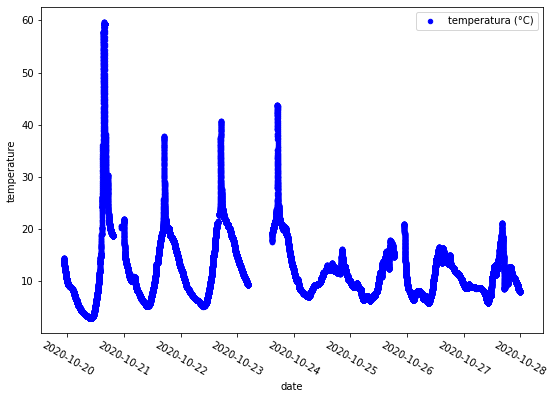

In [15]:
#Temperatura
ax1 = df2.plot(kind='scatter', x='date', y='temperature', color='b', label="temperatura (°C)") 

ax1.legend()

plt.xticks(rotation=-30)
plt.savefig("temperatura_exterior.pdf")
plt.show()


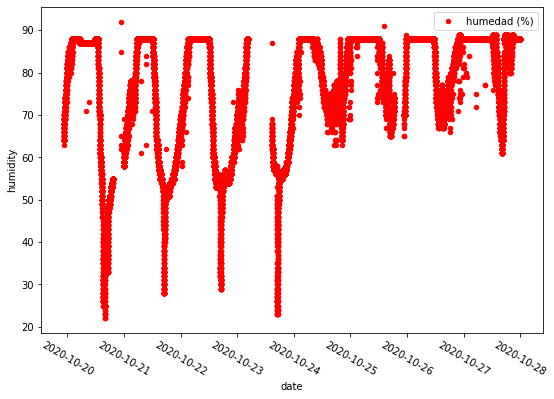

In [17]:
# Humedad
ax1 = df2.plot(kind='scatter', x='date', y='humidity', color='r', label="humedad (%)") 

ax1.legend()

plt.xticks(rotation=-30)
plt.savefig("humedad_exterior.pdf")
plt.show()


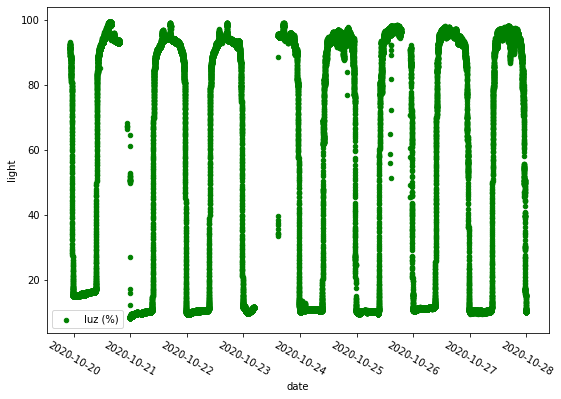

In [16]:
# Luz
ax1 = df2.plot(kind='scatter', x='date', y='light', color='g',  label="luz (%)") 

ax1.legend()

plt.xticks(rotation=-30)
plt.savefig("luz_exterior.pdf")
plt.show()


In [18]:
#Temperatura
media = df2["temperature"].mean()
mediana = df2["temperature"].median()
moda = df2["temperature"].mode()
print(media,mediana,moda)

11.940110858700592 10.5 0    8.7
dtype: float64


In [19]:
#Humedad
media = df2["humidity"].mean()
mediana = df2["humidity"].median()
moda = df2["humidity"].mode()
print(media,mediana,moda)

77.21715968800568 84.0 0    88.0
dtype: float64


In [20]:
#Luz
media = df2["light"].mean()
mediana = df2["light"].median()
moda = df2["light"].mode()
print(media,mediana,moda)

56.54784341514133 85.44922 0    10.35156
dtype: float64
